# Evaluación del Modelo COMPAS

In [5]:
from funciones_1 import *

In [6]:
df_compas_raw_risk_of_reicidivism = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/main/users/Grupo/df_compas_raw_risk_of_reicidivism.csv", delimiter=',')
df_compas_2y = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/main/users/Grupo/df_compas_2y.csv", delimiter=',')

In [7]:
# Definir el umbral para alto riesgo en COMPAS
threshold = 8
df_compas_2y['compas_pred_high_risk'] = df_compas_2y['decile_score'] >= threshold

### 1. Función para Generar y Visualizar Matrices de Confusión:

Vamos a crear una función que genere y visualice matrices de confusión para diferentes subgrupos basados en variables relevantes como género, raza y categoría de edad.

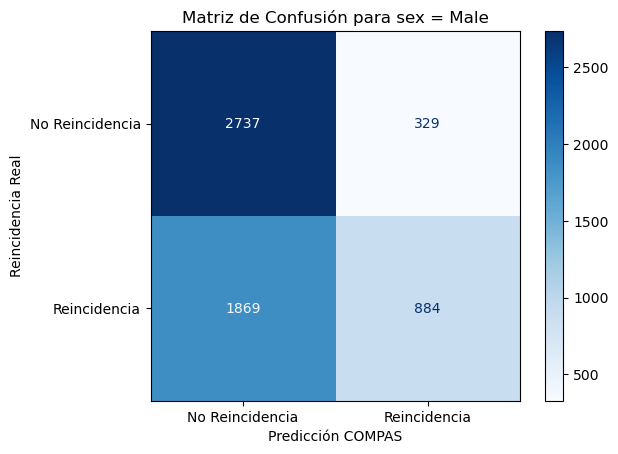

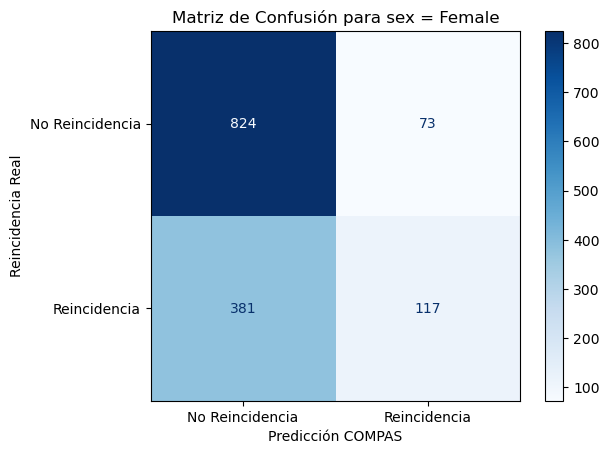

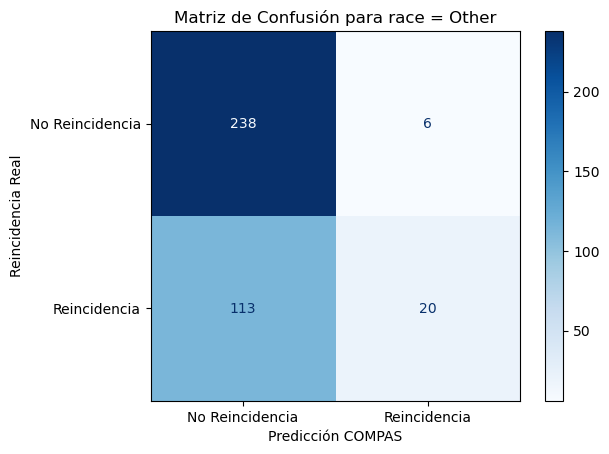

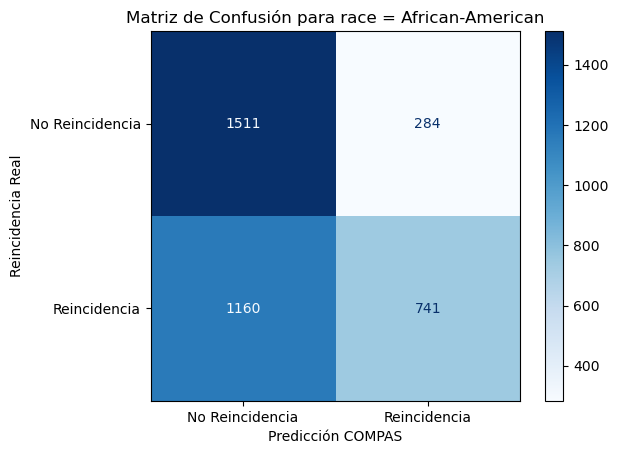

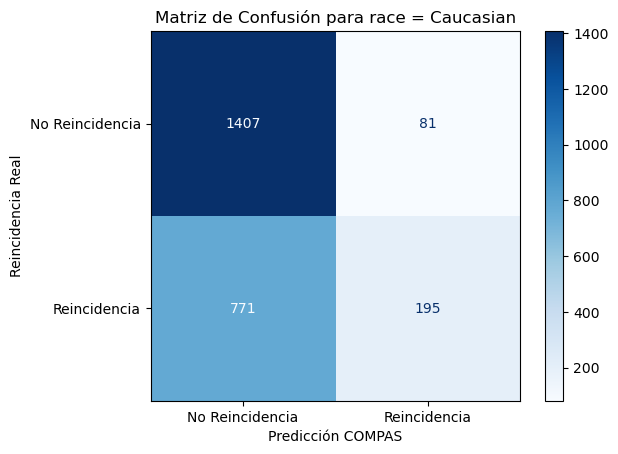

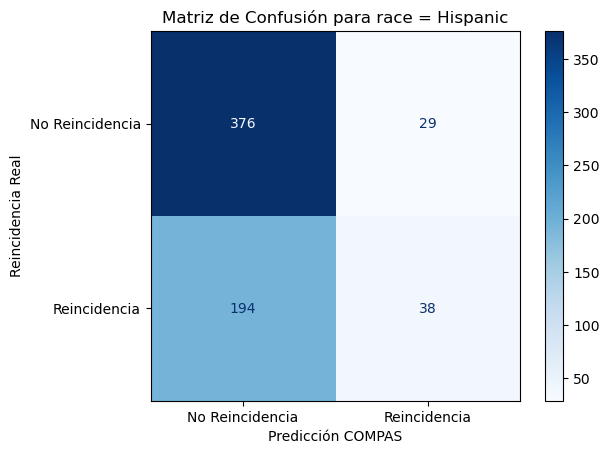

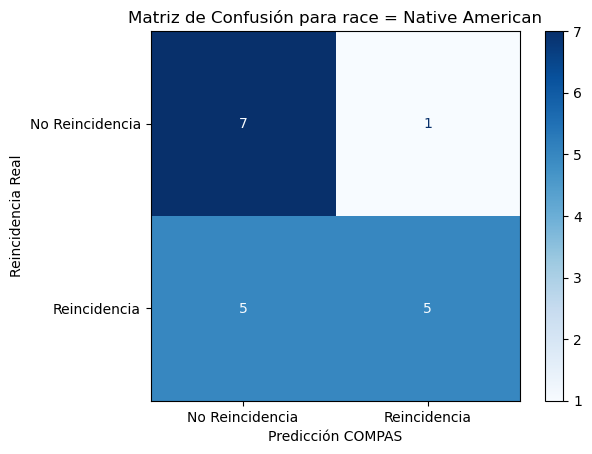

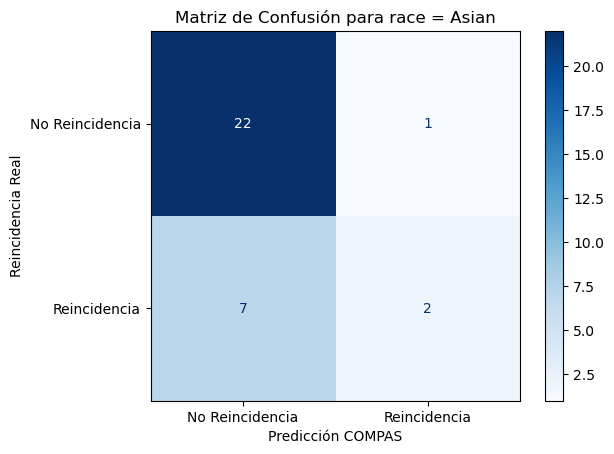

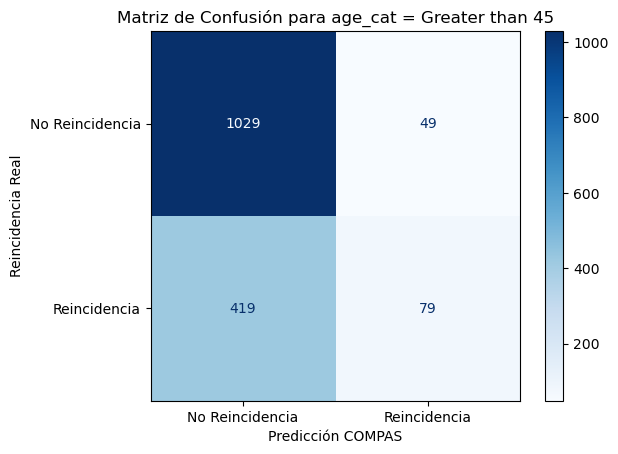

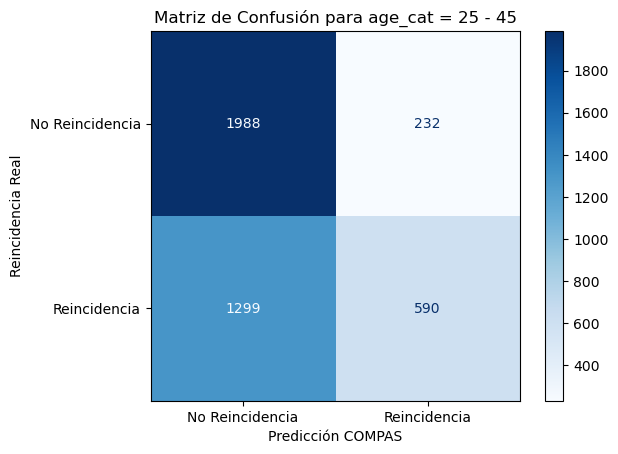

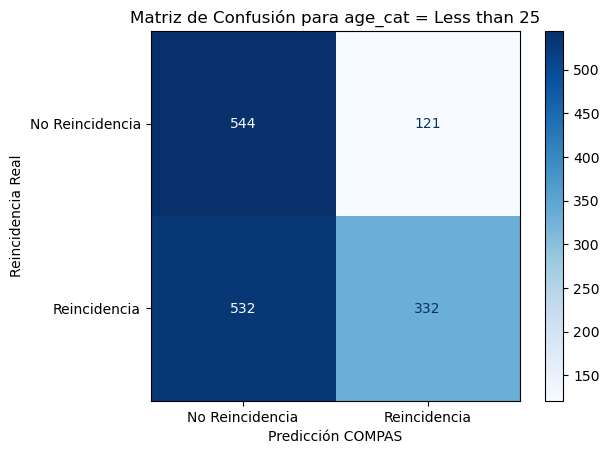

In [8]:
def plot_confusion_matrix_by_group(df, group_column):
    unique_groups = df[group_column].unique()

    for subgroup in unique_groups:
        # Filtrar los datos por el subgrupo
        subgroup_df = df[df[group_column] == subgroup]

        # Crear la matriz de confusión
        cm = confusion_matrix(subgroup_df['two_year_recid'], subgroup_df['compas_pred_high_risk'], labels=[0, 1])

        # Visualizar la matriz de confusión usando ConfusionMatrixDisplay
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Reincidencia', 'Reincidencia'])
        disp.plot(cmap='Blues')
        plt.title(f'Matriz de Confusión para {group_column} = {subgroup}')
        plt.xlabel('Predicción COMPAS')
        plt.ylabel('Reincidencia Real')
        plt.show()

# Evaluar el modelo COMPAS para diferentes variables relevantes
for group in ['sex', 'race', 'age_cat']:
    plot_confusion_matrix_by_group(df_compas_2y, group)

In [9]:
for group in ['sex', 'race', 'age_cat']:
    unique_groups = df_compas_2y[group].unique()

    for subgroup in unique_groups:
        # Filtrar los datos por el subgrupo
        subgroup_df = df_compas_2y[df_compas_2y[group] == subgroup]

        # Crear la matriz de confusión
        cm = confusion_matrix(subgroup_df['two_year_recid'], subgroup_df['compas_pred_high_risk'], labels=[0, 1])
        
        # Imprimir la matriz de confusión
        print(f"Matriz de confusión para {group} = {subgroup}:")
        print(cm)
        print()  # Agregar un espacio entre las matrices de confusión

Matriz de confusión para sex = Male:
[[2737  329]
 [1869  884]]

Matriz de confusión para sex = Female:
[[824  73]
 [381 117]]

Matriz de confusión para race = Other:
[[238   6]
 [113  20]]

Matriz de confusión para race = African-American:
[[1511  284]
 [1160  741]]

Matriz de confusión para race = Caucasian:
[[1407   81]
 [ 771  195]]

Matriz de confusión para race = Hispanic:
[[376  29]
 [194  38]]

Matriz de confusión para race = Native American:
[[7 1]
 [5 5]]

Matriz de confusión para race = Asian:
[[22  1]
 [ 7  2]]

Matriz de confusión para age_cat = Greater than 45:
[[1029   49]
 [ 419   79]]

Matriz de confusión para age_cat = 25 - 45:
[[1988  232]
 [1299  590]]

Matriz de confusión para age_cat = Less than 25:
[[544 121]
 [532 332]]



### 2. Calculo y visualización de métricas adicionales como la precisión, sensibilidad, y F1-score para cada subgrupo, utilizando los datos de la matriz de confusión.

In [10]:
def evaluate_model_metrics(df, group_column):
    unique_groups = df[group_column].unique()

    for subgroup in unique_groups:
        subgroup_df = df[df[group_column] == subgroup]

        y_true = subgroup_df['two_year_recid']
        y_pred = subgroup_df['compas_pred_high_risk']

        # Calcular métricas
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)

        print(f'\nMétricas para {group_column} = {subgroup}:')
        print(f'Precisión (Accuracy): {accuracy:.2f}')
        print(f'Precisión (Precision): {precision:.2f}')
        print(f'Sensibilidad (Recall): {recall:.2f}')
        print(f'F1-Score: {f1:.2f}')
        print(f'Especificidad: {specificity:.2f}')

# Ejecutar para los subgrupos relevantes
for group in ['sex', 'race', 'age_cat']:
    evaluate_model_metrics(df_compas_2y, group)


Métricas para sex = Male:
Precisión (Accuracy): 0.62
Precisión (Precision): 0.73
Sensibilidad (Recall): 0.32
F1-Score: 0.45
Especificidad: 0.89

Métricas para sex = Female:
Precisión (Accuracy): 0.67
Precisión (Precision): 0.62
Sensibilidad (Recall): 0.23
F1-Score: 0.34
Especificidad: 0.92

Métricas para race = Other:
Precisión (Accuracy): 0.68
Precisión (Precision): 0.77
Sensibilidad (Recall): 0.15
F1-Score: 0.25
Especificidad: 0.98

Métricas para race = African-American:
Precisión (Accuracy): 0.61
Precisión (Precision): 0.72
Sensibilidad (Recall): 0.39
F1-Score: 0.51
Especificidad: 0.84

Métricas para race = Caucasian:
Precisión (Accuracy): 0.65
Precisión (Precision): 0.71
Sensibilidad (Recall): 0.20
F1-Score: 0.31
Especificidad: 0.95

Métricas para race = Hispanic:
Precisión (Accuracy): 0.65
Precisión (Precision): 0.57
Sensibilidad (Recall): 0.16
F1-Score: 0.25
Especificidad: 0.93

Métricas para race = Native American:
Precisión (Accuracy): 0.67
Precisión (Precision): 0.83
Sensibil

In [11]:
def calculate_metrics(df, group_column):
    metrics = []
    unique_groups = df[group_column].unique()

    for subgroup in unique_groups:
        subgroup_df = df[df[group_column] == subgroup]

        y_true = subgroup_df['two_year_recid']
        y_pred = subgroup_df['compas_pred_high_risk']

        # Calcular métricas
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)

        metrics.append({
            'Subgrupo': subgroup,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Specificity': specificity
        })

    return pd.DataFrame(metrics)

# Calcular métricas para cada grupo
metrics_sex = calculate_metrics(df_compas_2y, 'sex')
metrics_race = calculate_metrics(df_compas_2y, 'race')
metrics_age = calculate_metrics(df_compas_2y, 'age_cat')

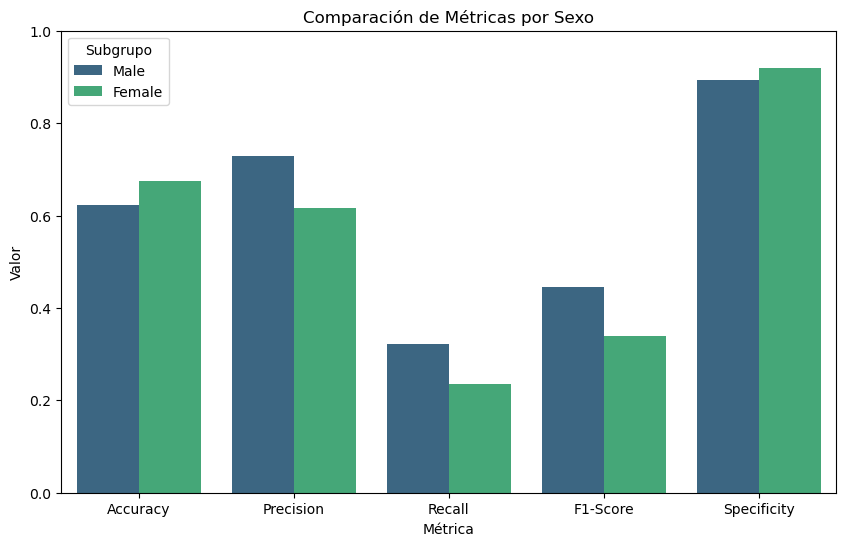

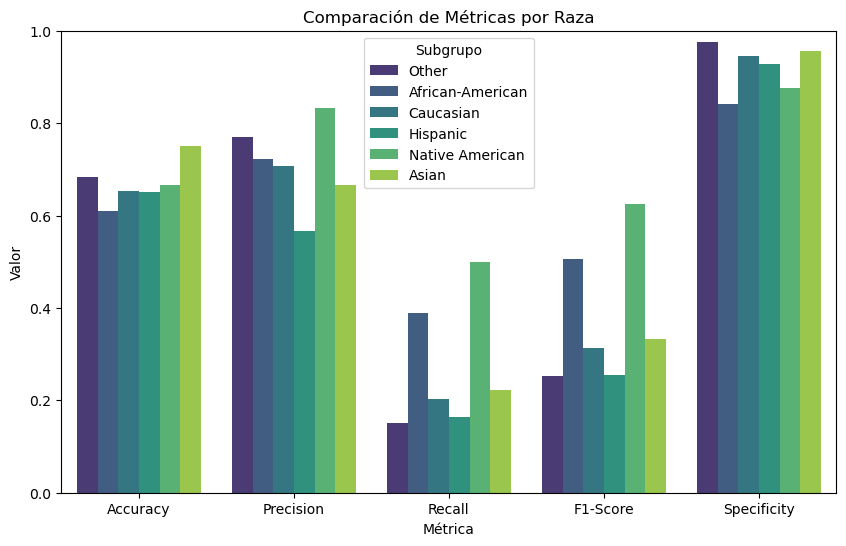

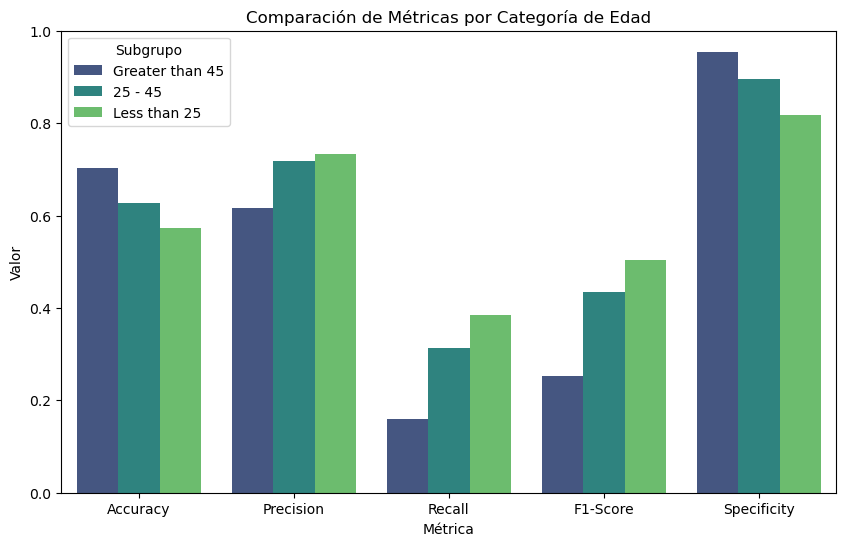

In [12]:
def plot_metrics(metrics_df, title):
    metrics_df = metrics_df.melt(id_vars=['Subgrupo'], var_name='Métrica', value_name='Valor')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Métrica', y='Valor', hue='Subgrupo', data=metrics_df, palette='viridis')
    plt.title(title)
    plt.ylabel('Valor')
    plt.ylim(0, 1)  # Las métricas están entre 0 y 1
    plt.legend(title='Subgrupo')
    plt.show()

# Gráficos comparativos para cada grupo
plot_metrics(metrics_sex, 'Comparación de Métricas por Sexo')
plot_metrics(metrics_race, 'Comparación de Métricas por Raza')
plot_metrics(metrics_age, 'Comparación de Métricas por Categoría de Edad')

### 3. Cálculo de AUC y ROC

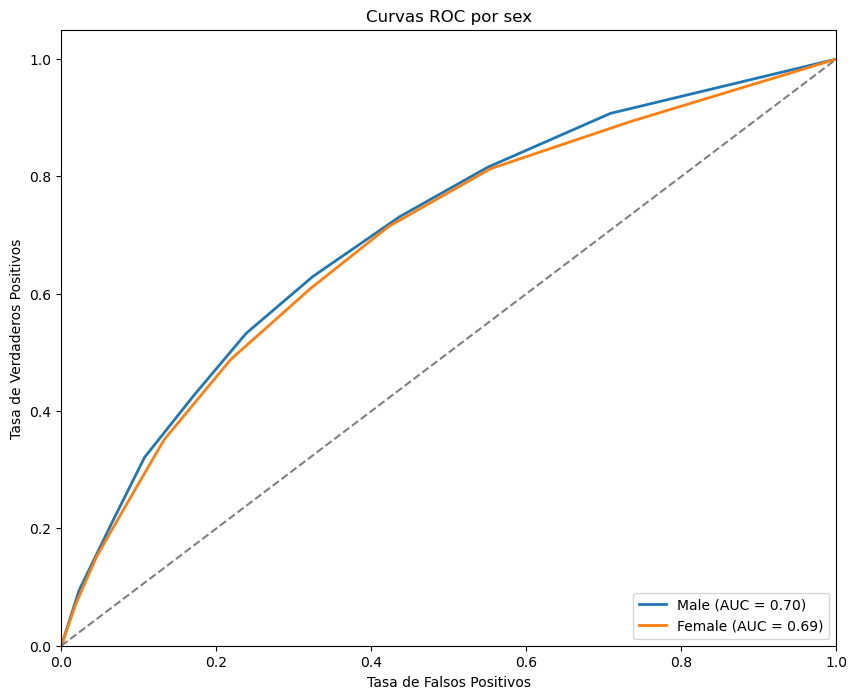

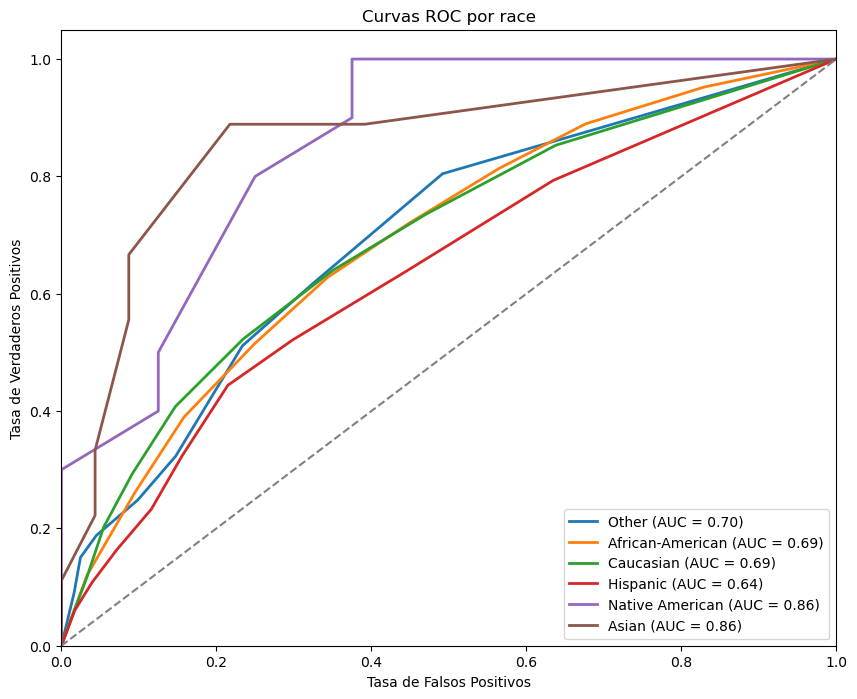

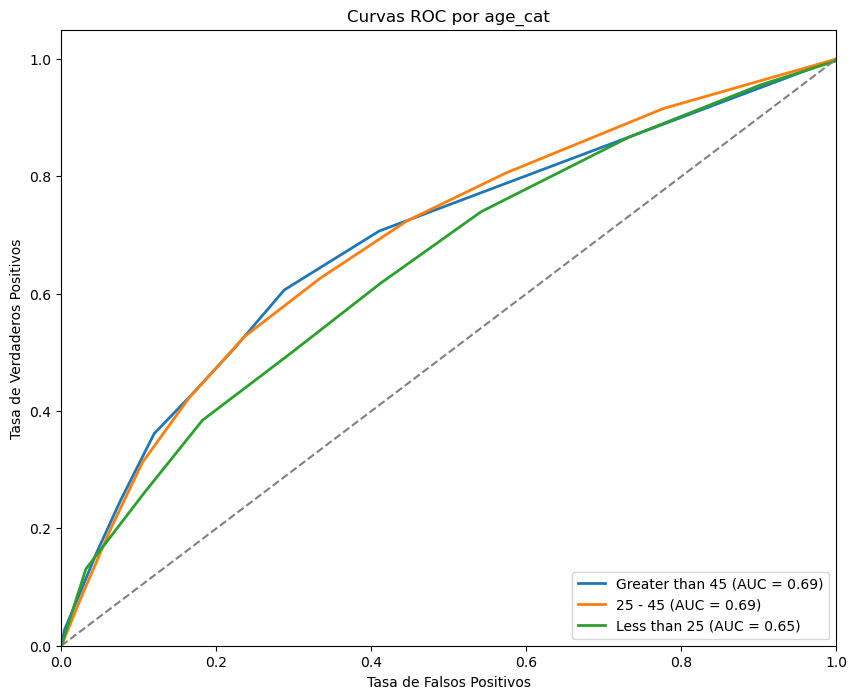

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve_by_group(df, group_column):
    unique_groups = df[group_column].unique()

    plt.figure(figsize=(10, 8))
    
    for subgroup in unique_groups:
        subgroup_df = df[df[group_column] == subgroup]
        y_true = subgroup_df['two_year_recid']
        y_scores = subgroup_df['decile_score']  # Usamos decile_score como estimación de probabilidad

        # Calcular curva ROC y AUC
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plotear la curva ROC
        plt.plot(fpr, tpr, lw=2, label=f'{subgroup} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curvas ROC por {group_column}')
    plt.legend(loc="lower right")
    plt.show()

# Generar las curvas ROC y AUC por subgrupo
plot_roc_curve_by_group(df_compas_2y, 'sex')
plot_roc_curve_by_group(df_compas_2y, 'race')
plot_roc_curve_by_group(df_compas_2y, 'age_cat')